In [63]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [64]:
#Читаю файлы
dub1 = pd.read_csv('C:\\Users\\eatropynina\\LS\\tweeter_dub1.csv', sep = ';', encoding='utf-8')
dub2 = pd.read_csv('C:\\Users\\eatropynina\\LS\\tweeter_dub2.csv', sep = ';', encoding='utf-8')

In [65]:
#Меняю название колонок на английские для дальнейшей удобной работы
dub1.rename(columns={'Автор поста': 'author_name_1', 'Вид автора поста': 'type_author_1','текст поста':'text_1','дата поста':'date_1'}, inplace=True)
dub2.rename(columns={'Автор поста': 'author_name_2', 'Вид автора поста': 'type_author_2','текст поста':'text_2','дата поста':'date_2'}, inplace=True)

In [66]:
#Изменила тип данных на корректный тип
dub1['date_1'] = pd.to_datetime(dub1['date_1'], dayfirst=True)
dub1['text_1'] = dub1['text_1'].astype("string")

#Изменила тип данных для даты на корректный тип
dub2['date_2'] = pd.to_datetime(dub2['date_2'], dayfirst=True)
dub2['text_2'] = dub2['text_2'].astype("string")

#Привела весь текст к нижнему регистру, чтобы легче было искать слова
dub1['text_1'] = dub1['text_1'].str.lower()
dub2['text_2'] = dub2['text_2'].str.lower()

In [67]:
#Проверила датасет на пустые значения
dub2.isnull().sum()

author_name_2    0
type_author_2    0
text_2           0
date_2           0
dtype: int64

In [68]:
dub1.isnull().sum()

author_name_1    0
type_author_1    0
text_1           0
date_1           0
dtype: int64

In [69]:
#Посмотрела нет ли дублей в таблице - проверила все столбцы
dub2['type_author_2'].value_counts().sort_values(ascending=False)

type_author_2
Енот       32
Заяц       25
Волк       23
Ворон      23
Олень      22
Лис        19
Воробей    19
Сорока     19
Синица     17
Еж         16
Белка      15
Медведь    15
Детял      14
Name: count, dtype: int64

In [70]:
#Создала список позитивных и негативных слов
list_p = ['хороших','забавные', 'спасибо,', 'радостно','радости.','жизнерадостные','радостный','радостью','радость','радостью!','радостными', 'вкусностями!','вкусные','вкусным.','вкусным!','вкусного','вкусный','вкусные', 'забавными!','забавный', 'милым','милыми','милые','уютную','уютный','уютное', 
          'весело','веселящихся','веселым','веселыми','веселые','веселое','веселье!','весело!','веселую','веселая', 'мелодичное','мелодично','мелодичные','мелодичный', 'свободный','свободными!', 'ласковый','весельем.'
          ,'впечатляющая', 'талантливым!','талантливым','талантливая!','талантом!','талантливые','талантами','вдохновляют','вдохновляющими','оптимизмом','оптимизм']
list_n=['ненавистный', 'безответственными','безответственным','безответственность!','безответственности!','безответственного', 'дикие','диких', 'дикого','дикой', 'безнаказанной!','наказания!','наказанию!','наказания','безнаказанным!', 'жестокость','жестокости','жестокость!','жестокости!', 'убийство', 'убийцам','убийц!', 'деревоубийцам','деревоубийца', 'прикончить', 'странную'
        'бед!','беда', 'виноват!', 'варварство!', 'грустью','грустно','грустный','грустном','грусть', 'печали.','печалью','печаль.','печальный','печали','печальном','печально','печально,', 'печаль','плохой','плохое!', 'фейк','утраты','горькой']



In [71]:
#Создаю пустой список, который буду заполнять словами из постов
dub1_words = []

for i in range(len(dub1)):
    words = dub1['text_1'][i].split()
    dub1_words.extend(words)

#Сравниваю элементы списков друг с другом и вывожу количество позитивных слов
positive_dub1 = set(dub1_words) & set(list_p)
count_positive_dub1 = len(positive_dub1)
count_positive_dub1

33

In [72]:
#Сравниваю элементы списков друг с другом и вывожу количество негативных слов

negative_dub1 = set(dub1_words) & set(list_n)
count_negative_dub1 = len(negative_dub1)
count_negative_dub1

28

In [73]:
#Создаю столбец, в который вынесу все слова в виде списка
dub1['count_p'] = dub1['text_1'].str.split()
#Создаю столбец, в который вынесу все позитивные слова в виде списка
dub1['positive_dub1'] = dub1['count_p'].apply(lambda x: set(x) & set(list_p))
#Создаю столбец, который считает кол-во позитивных слов в строчке
dub1['count_every_positive_dub1'] = dub1['positive_dub1'].apply(len)

#Делаю те же действия для негативных слов
dub1['count_n'] = dub1['text_1'].str.split()
dub1['negative_dub1'] = dub1['count_n'].apply(lambda x: set(x) & set(list_p))
dub1['count_every_negative_dub1'] = dub1['negative_dub1'].apply(len)

dub1

,author_name_1,type_author_1,text_1,date_1,count_p,positive_dub1,count_every_positive_dub1,count_n,negative_dub1,count_every_negative_dub1
0,Никита,Заяц,вчера в лесу прошел забавный конкурс на лучшее...,2024-08-26,"[вчера, в, лесу, прошел, забавный, конкурс, на...",{забавный},1,"[вчера, в, лесу, прошел, забавный, конкурс, на...",{забавный},1
1,Алиса,Лис,"сегодня встретил в лесу стайку воробьев, котор...",2024-08-02,"[сегодня, встретил, в, лесу, стайку, воробьев,...","{радостно, вдохновляют}",2,"[сегодня, встретил, в, лесу, стайку, воробьев,...","{радостно, вдохновляют}",2
2,Костя,Воробей,"сегодня встретил в лесу воробьев, радостно чир...",2024-06-02,"[сегодня, встретил, в, лесу, воробьев,, радост...","{радостью, радостно}",2,"[сегодня, встретил, в, лесу, воробьев,, радост...","{радостью, радостно}",2
3,Мария,Лис,утром услышал звуки выстрелов охотников. пора ...,2024-08-04,"[утром, услышал, звуки, выстрелов, охотников.,...",{},0,"[утром, услышал, звуки, выстрелов, охотников.,...",{},0
4,Ольга,Енот,утром наблюдал за игрой белок на поляне. они б...,2024-07-19,"[утром, наблюдал, за, игрой, белок, на, поляне...",{забавными!},1,"[утром, наблюдал, за, игрой, белок, на, поляне...",{забавными!},1
...,...,...,...,...,...,...,...,...,...,...
254,Мария,Волк,сегодня в лесу заметил странное свечение. каже...,2024-06-10,"[сегодня, в, лесу, заметил, странное, свечение...",{},0,"[сегодня, в, лесу, заметил, странное, свечение...",{},0
255,Семен,Олень,слышал шепот деревьев от ветра. лучшая колыбел...,2024-08-26,"[слышал, шепот, деревьев, от, ветра., лучшая, ...",{},0,"[слышал, шепот, деревьев, от, ветра., лучшая, ...",{},0
256,Егор,Заяц,"сегодня встретил в лесу ручей, бурлящий своими...",2024-07-28,"[сегодня, встретил, в, лесу, ручей,, бурлящий,...",{},0,"[сегодня, встретил, в, лесу, ручей,, бурлящий,...",{},0
257,Марина,Олень,"на прогулке обнаружил место, где раскинулись м...",2024-08-09,"[на, прогулке, обнаружил, место,, где, раскину...",{},0,"[на, прогулке, обнаружил, место,, где, раскину...",{},0


In [74]:
dubb1 = count_positive_dub1/(count_positive_dub1+count_negative_dub1)
dubb1 #Доля позитивных постов среди общего количества

0.5409836065573771

In [75]:
dub2_words = []

for i in range(len(dub2)):
    words = dub2['text_2'][i].split()
    dub2_words.extend(words)

positive_dub2 = set(dub2_words) & set(list_p)
count_positive_dub2 = len(positive_dub2)
count_positive_dub2

36

In [76]:
negative_dub2 = set(dub2_words) & set(list_n)
count_negative_dub2 = len(negative_dub2)
count_negative_dub2

24

In [77]:
dubb2 = count_positive_dub2/(count_positive_dub2+count_negative_dub2)
dubb2 #Доля позитивных постов среди общего количества

0.6

В СРЕДНЕМ БОЛЕЕ ДОБРЫЙ ДУБ №2, ТАК КАК ДОЛЯ И КОЛ-ВО ПОЗИТИВНЫХ ПОСТОВ У НЕГО ВЫШЕ

In [78]:
dub2['count_p'] = dub2['text_2'].str.split()
dub2['positive_dub2'] = dub2['count_p'].apply(lambda x: set(x) & set(list_p))
dub2['count_every_positive_dub2'] = dub2['positive_dub2'].apply(len)


dub2['count_n'] = dub2['text_2'].str.split()
dub2['negative_dub2'] = dub2['count_n'].apply(lambda x: set(x) & set(list_p))
dub2['count_every_negative_dub2'] = dub2['negative_dub2'].apply(len)
dub2

,author_name_2,type_author_2,text_2,date_2,count_p,positive_dub2,count_every_positive_dub2,count_n,negative_dub2,count_every_negative_dub2
0,Дмитрий,Синица,"на прогулке обнаружил поляну, покрытую цветами...",2024-08-29,"[на, прогулке, обнаружил, поляну,, покрытую, ц...",{},0,"[на, прогулке, обнаружил, поляну,, покрытую, ц...",{},0
1,Алиса,Лис,"сегодня в лесу встретил странную стрекозу, кот...",2024-08-21,"[сегодня, в, лесу, встретил, странную, стрекоз...",{},0,"[сегодня, в, лесу, встретил, странную, стрекоз...",{},0
2,Ольга,Белка,"эти наглые люди считают, что лес принадлежит и...",2024-08-23,"[эти, наглые, люди, считают,, что, лес, принад...",{},0,"[эти, наглые, люди, считают,, что, лес, принад...",{},0
3,Мария,Лис,"на утренней зарядке заметил, что деревья начал...",2024-06-11,"[на, утренней, зарядке, заметил,, что, деревья...",{},0,"[на, утренней, зарядке, заметил,, что, деревья...",{},0
4,Ольга,Заяц,"сегодня встретил в лесу одинокого сокола, сидя...",2024-07-06,"[сегодня, встретил, в, лесу, одинокого, сокола...",{},0,"[сегодня, встретил, в, лесу, одинокого, сокола...",{},0
...,...,...,...,...,...,...,...,...,...,...
254,Алиса,Олень,"сегодня встретил в лесу семью белок, играющих ...",2024-07-20,"[сегодня, встретил, в, лесу, семью, белок,, иг...","{веселящихся, радость}",2,"[сегодня, встретил, в, лесу, семью, белок,, иг...","{веселящихся, радость}",2
255,Костя,Олень,"сегодня встретил в лесу стаю белок, играющих и...",2024-06-20,"[сегодня, встретил, в, лесу, стаю, белок,, игр...","{весельем., веселящихся, радость, оптимизмом}",4,"[сегодня, встретил, в, лесу, стаю, белок,, игр...","{весельем., веселящихся, радость, оптимизмом}",4
256,Марина,Медведь,наблюдал за игрой лисы с ее детенышами. они бы...,2024-07-10,"[наблюдал, за, игрой, лисы, с, ее, детенышами....",{},0,"[наблюдал, за, игрой, лисы, с, ее, детенышами....",{},0
257,Семен,Сорока,"сегодня встретил в лесу наглого туриста, котор...",2024-08-29,"[сегодня, встретил, в, лесу, наглого, туриста,...",{},0,"[сегодня, встретил, в, лесу, наглого, туриста,...",{},0


In [79]:
sum_count2 = dub2.groupby('type_author_2')['count_every_positive_dub2'].sum()
sum_count2.sort_values(ascending=False)

type_author_2
Олень      14
Енот       12
Заяц       11
Сорока     11
Синица      9
Волк        6
Ворон       6
Лис         6
Воробей     5
Белка       4
Детял       4
Еж          4
Медведь     0
Name: count_every_positive_dub2, dtype: int64

In [80]:
sum_count1 = dub1.groupby('type_author_1')['count_every_positive_dub1'].sum()
sum_count1.sort_values(ascending=False)

type_author_1
Заяц       11
Енот       10
Лис        10
Белка       8
Детял       8
Воробей     7
Ворон       7
Синица      6
Еж          5
Сорока      5
Медведь     4
Волк        3
Олень       3
Name: count_every_positive_dub1, dtype: int64

Самый добрый тип животных для Дуба №1: Заяц (11 упоминаний "положительных" слов в постах)

Самый добрый тип животных для Дуба №2: Олень (14 упоминаний "положительных" слов в постах)

In [86]:
average_counts_1 = dub1.groupby('date_1')['count_every_positive_dub1'].mean()
overall_mean_1 = average_counts_1.mean()

count_days_above_mean = 0
for date, count in average_counts_1.items():
    if count > overall_mean_1:
        count_days_above_mean += 1

print("Количество дней для первого дуба, где среднее значение больше общего среднего:", count_days_above_mean)



Количество дней для первого дуба, где среднее значение больше общего среднего: 34


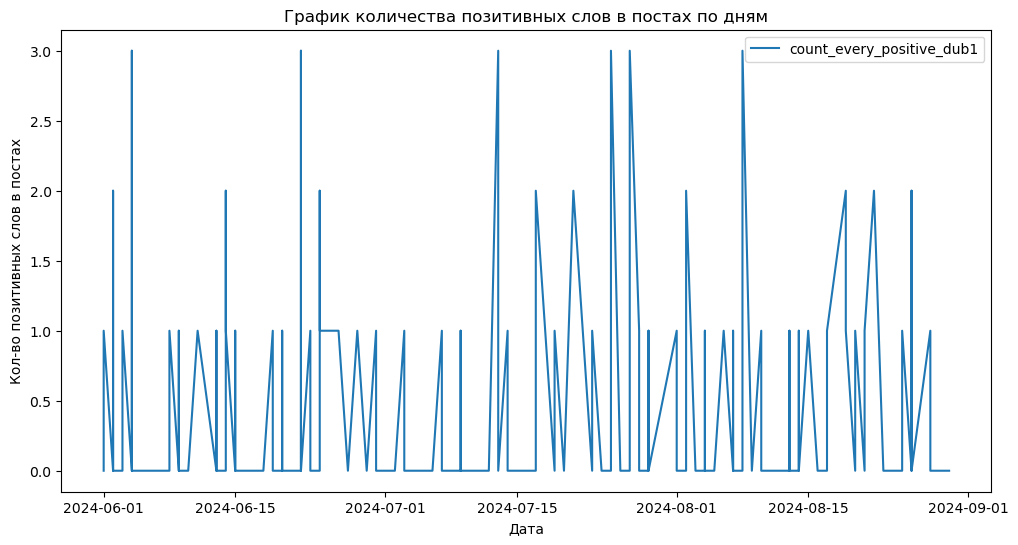

In [85]:
# Сортируем DataFrame по столбцу date_1
dub1 = dub1.sort_values('date_1')

# Строим график для того, чтобы визуально увидеть дни, когда позитивных слов в постах было много!
plt.figure(figsize=(12, 6))
plt.plot(dub1['date_1'], dub1['count_every_positive_dub1'], label='count_every_positive_dub1')
plt.xlabel('Дата')
plt.ylabel('Кол-во позитивных слов в постах')
plt.title('График количества позитивных слов в постах по дням для Дуба №1')
plt.legend()


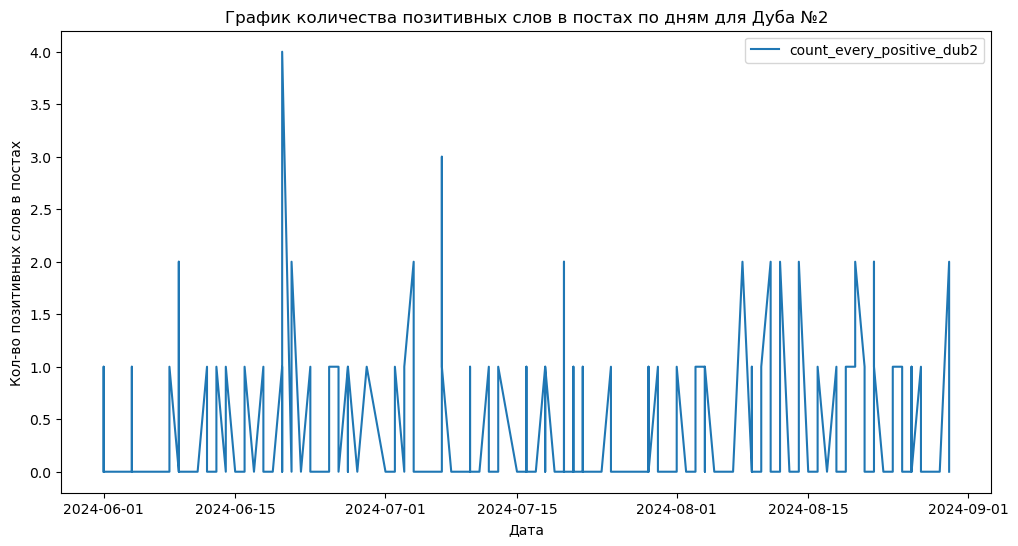

In [87]:
# Сортируем DataFrame по столбцу date_1
dub2 = dub2.sort_values('date_2')

# Строим график для того, чтобы визуально увидеть дни, когда позитивных слов в постах было много!
plt.figure(figsize=(12, 6))
plt.plot(dub2['date_2'], dub2['count_every_positive_dub2'], label='count_every_positive_dub2')
plt.xlabel('Дата')
plt.ylabel('Кол-во позитивных слов в постах')
plt.title('График количества позитивных слов в постах по дням для Дуба №2')
plt.legend()